# MIRACLE7 E-Commerce Shipping Data Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pal = sns.color_palette()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [ ]:
url = 'https://raw.githubusercontent.com/salsmardhiyah/EcommerceShippingData/main/E-Commerce%20Shipping%20Data-Train.csv'
df = pd.read_csv(url)

## 1. Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 

In [ ]:
df.info() # taking a look at info of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe() # getting description of data

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
# pengelompokan kolom untuk variabel kategorik
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [ ]:
# Ratio of delayed (1) and not delayed orders (0)
df['Reached.on.Time_Y.N'].value_counts() / df['Reached.on.Time_Y.N'].count()

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
# Percentage of delayed (1) and not delayed orders (0)
df['Reached.on.Time_Y.N'].value_counts() / df['Reached.on.Time_Y.N'].count() *100

1    59.669061
0    40.330939
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
df = df.drop('ID', axis=1)

In [ ]:
# Print some information about the data
print("Missing values:", df.isna().sum().sum())
print("Categorical features:", len(df.select_dtypes('object').columns))
print("Numerical features:", len(df.select_dtypes('number').columns))

Missing values: 0
Categorical features: 4
Numerical features: 7


Jawaban:

A. Kolom Reached.on.Time_Y.N seharusnya data type nya adalah object (boolean) karena variabel tersebut merupakan data kategorik yang mengartikan nilai 1 adalah no dan nilai 0 adalah yes.

B. Tidak ada kolom yang memiliki nilai kosong, dapat dilihat dari output di atas bahwa seluruh kolom memiliki jumlah baris yang sama dengan jumlah data yaitu 10.999 baris/data.

C. Kolom yang memiliki summary aneh: 
1. Kolom Weight in gms memiliki selisih nilai mean dan median yang cukup jauh yaitu sebesar 515 yang mengartikan bahwa variabel tersebut memiliki outlier/pencilan.
2. Kolom Mode_of_Shipment memiliki distribusi yang terlalu timpang karena nilai kategori Ship mendominasi, hal tersebut menyebabkan feature tidak akan terlalu berguna dalam klasifikasi 

## 2. Univariate Analysis

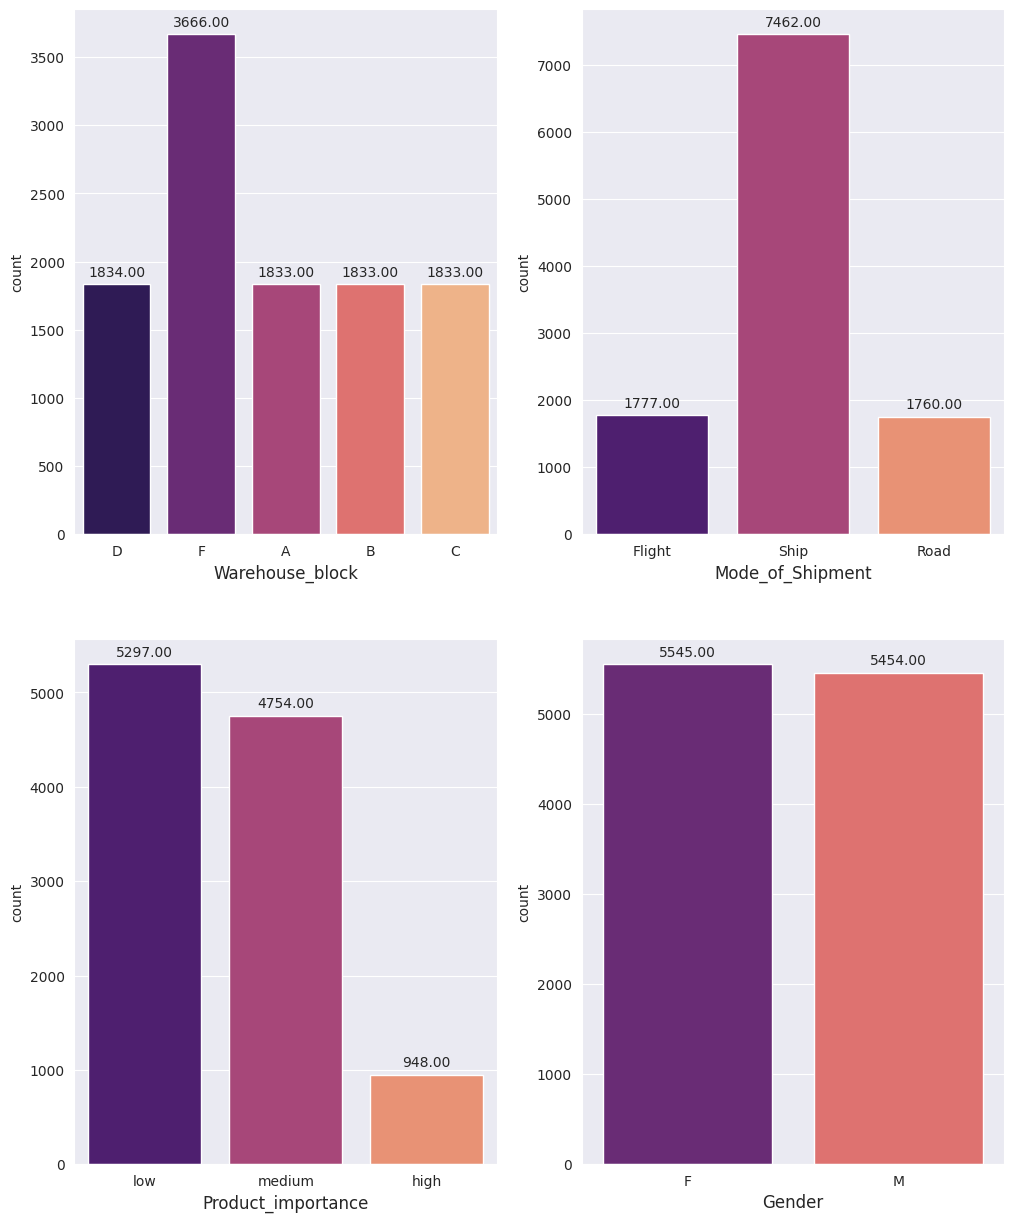

In [ ]:
dfcategory = df.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(12, 15)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.countplot(x = dfcategory[value],ax=subplot,palette='magma' )
    plotting.set_xlabel(value, fontsize = 12)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

- Warehouse Block: Persebaran pesanan pada blok A, B, C, D cukup merata sementara blok F memiliki jumlah pesanan yang jauh lebih besar yg bisa mencapai kurang lebih 2x lipat pesana di blok yang lain.

- Mode of Shipment : Mode pengirimin mengggunakan tarnsaportasi udara dan darat memiliki jumlah yang serupa sementara moda pengiriminan menggunakan transporatsi laut memiliki jumlah yang jauh lebih besar yaitu mencapai 4 x lipat dari moda pengiriman lainnya.

- Product Importance: low imporatnce dan medium importance menjadi data yg mayoritas sedangkan high importance menjadi data yg minoritas

- Gender: Kedua kelas seimbang.


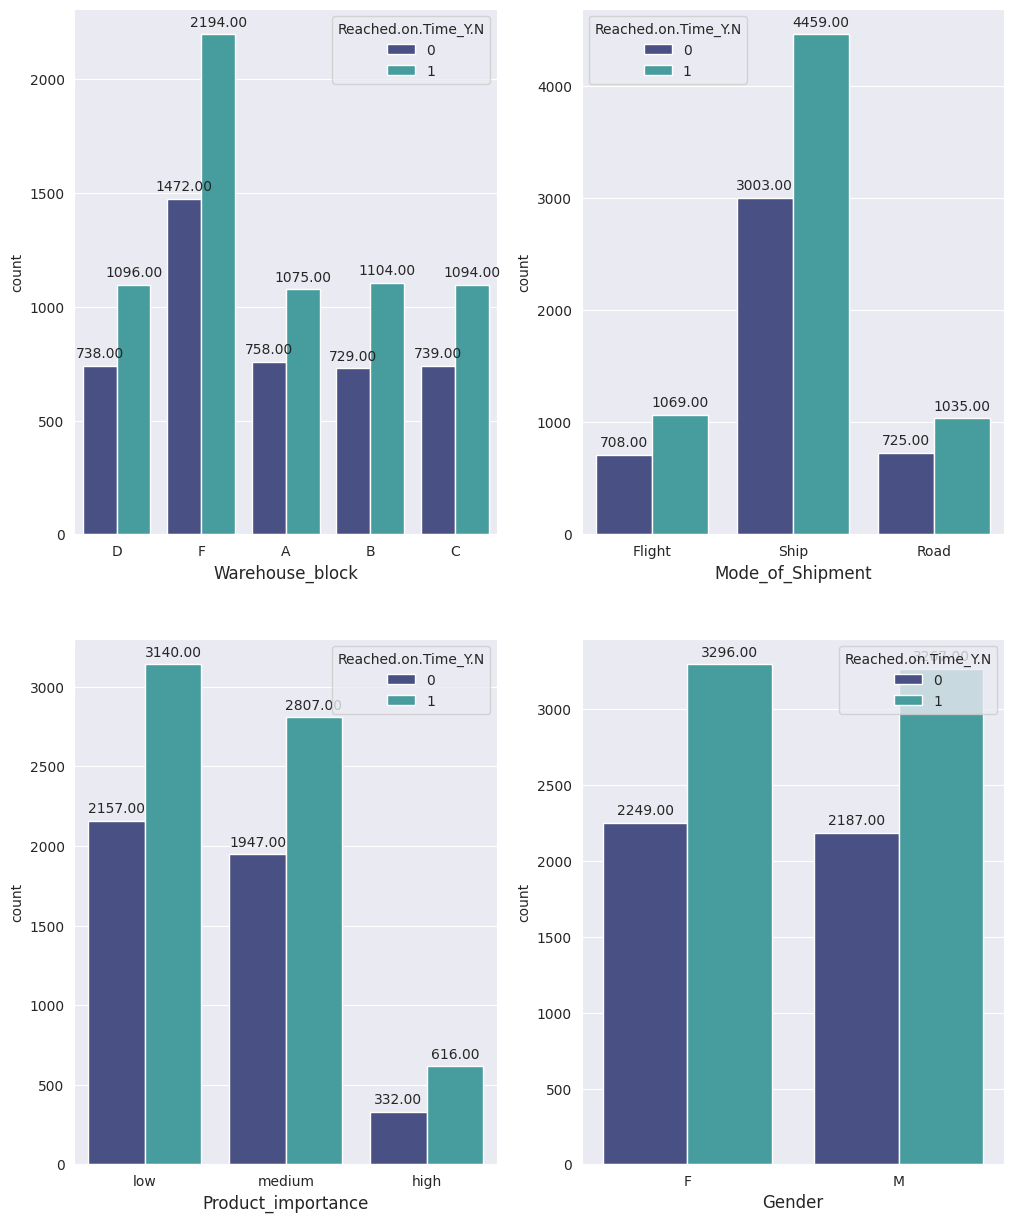

In [ ]:
dfcategory = df.select_dtypes(include = 'object')
fig,ax= plt.subplots(nrows=2,ncols=2,figsize=(12, 15)) 
for value, subplot in zip(dfcategory.columns,ax.flatten()):
    plotting = sns.countplot(x = dfcategory[value],ax=subplot,palette='mako', hue = df['Reached.on.Time_Y.N'] )
    plotting.set_xlabel(value, fontsize = 12)
    plotting.set_xticklabels(plotting.get_xticklabels())
    
    for p in plotting.patches:
        plotting.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')

plt.show()

- Sekitar 68% keterlambatan pengiriman disebabkan karena kapal digunakan sebagai moda pengiriman. Jadi, opsi alternatif seperti layanan Penerbangan dan Jalan dapat dipertimbangkan untuk mengurangi keterlambatan pengiriman

- Persentase pengiriman tertunda yang lebih tinggi dicatat di Gudang blok F sebesar 33%.

- Pemberian rating oleh pelanggan miliki sebaran data yang mirip. Hampir 20% dari total pengiriman menerima rating 5

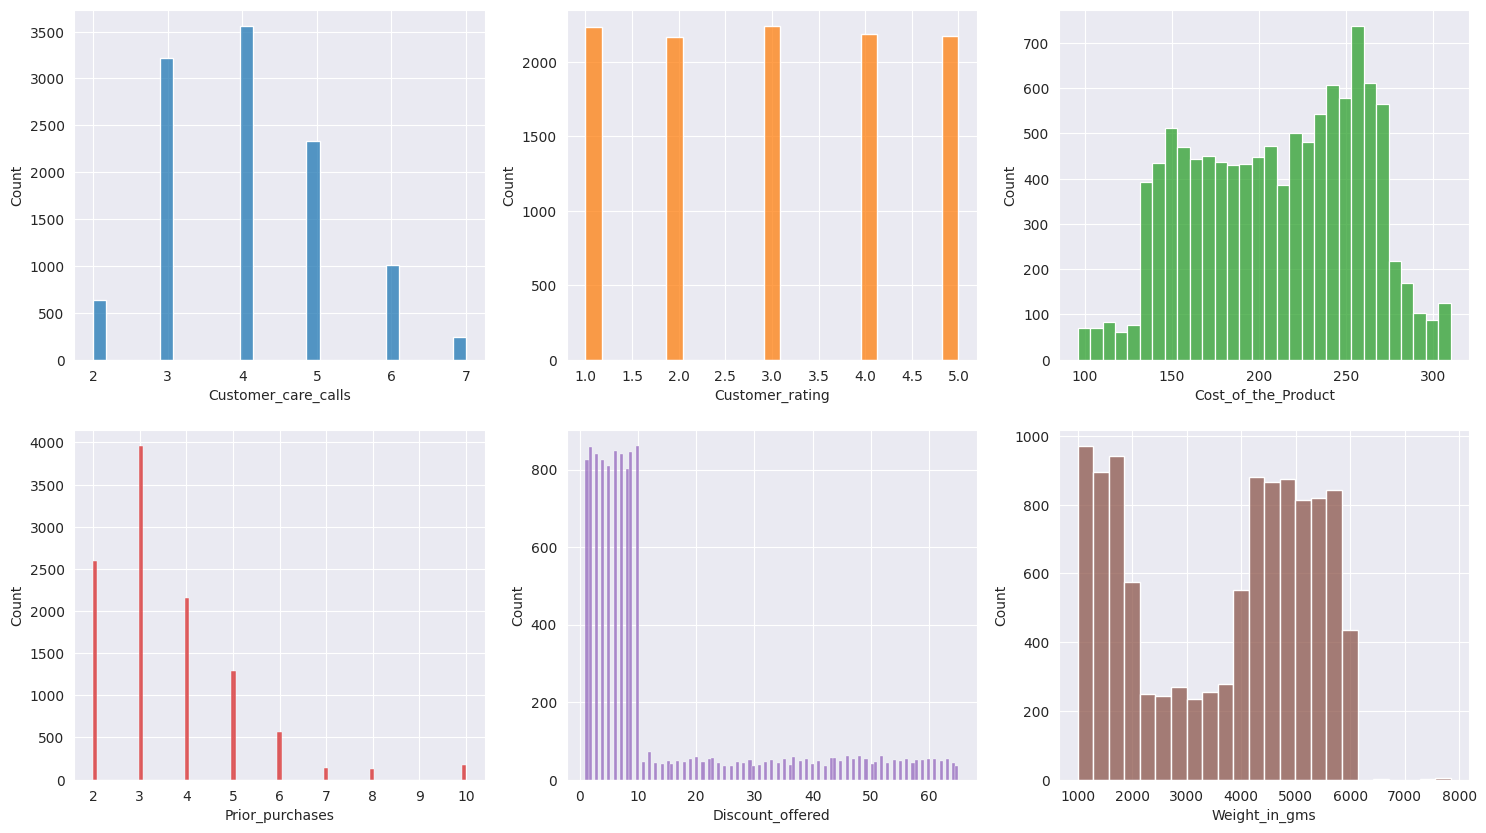

In [ ]:
# Display value distributions
plt.figure(figsize=(18, 10))

num_features = df.select_dtypes('number').drop('Reached.on.Time_Y.N', axis=1).columns.values

for i, num in enumerate(num_features):

    plt.subplot(2, 3, i+1)
    sns.histplot(df[num], color=pal[i])
    
plt.show()

- Customer Care Calls: Distribusi positively skewed dengan modus 4.

- Customer Rating:uniform distribution.

- Cost of the product:

- Prior purchases: Positively skewed dengan modus 3.

- Discount Offered: Dipisahkan menjadi 2 uniform distribution: 0 hingga 10 merupakan nilai mayoritas dan kemudian nilai minoritas lebih besar dari 10 hingga 65.

- Weight in gms: terbagi jadi 3 zona: tinggi dari 1000 hingga 2000 dan dari 4000 hingga 6000. Rendah dari 2000 hingga 4000.

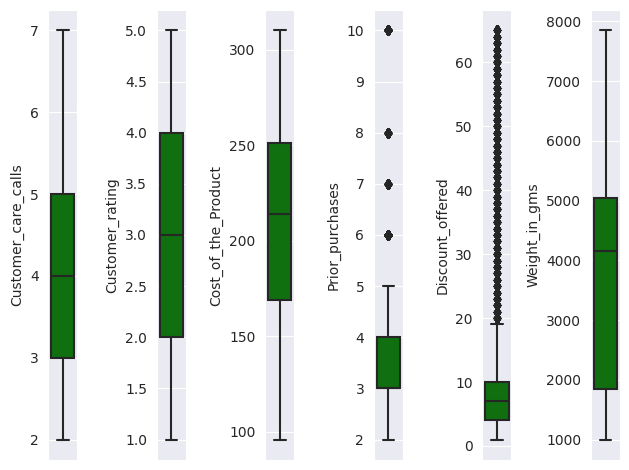

In [ ]:
for i in range(0, len(num_features)):
    plt.subplot(1, len(num_features), i+1)
    sns.boxplot(y=df[num_features[i]], color='green', orient='v')
    plt.tight_layout()

## 3. Multivariate Analysis

In [ ]:
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


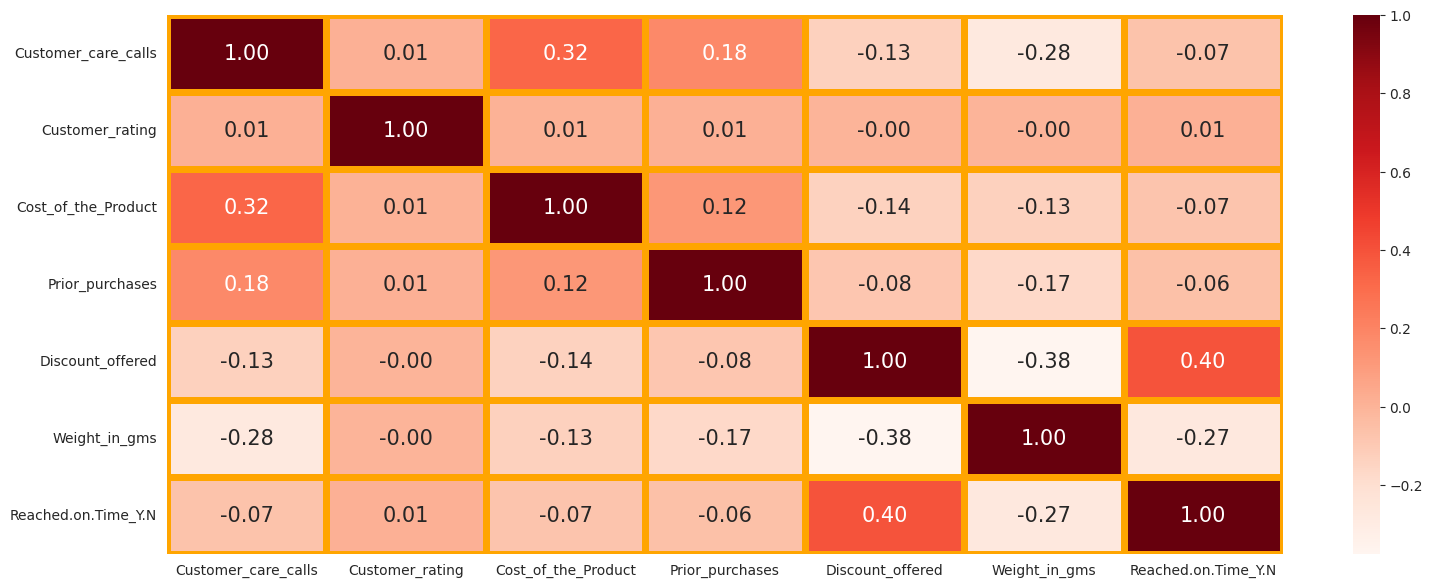

In [ ]:
# heatmap of the data for checking the correlation between the features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange', cmap = 'Reds')
plt.show()

- Insight yang menarik dapat dilihat bahwa discount dan ketepatan waktu sampainya barang saling berkorelasi, dimana semakin besar discount yang ditawarkan semakin tinggi kemungkinan barang samapi tidak tepat waktu.

- Biaya produk dan panggilan layanan pelanggan saling berkorelasi, dimana jika pelanggan kita membayar lebih banyak uang untuk produk, mereka cenderung memiliki lebih banyak melakukan customer care calls.


<Figure size 1500x1500 with 0 Axes>

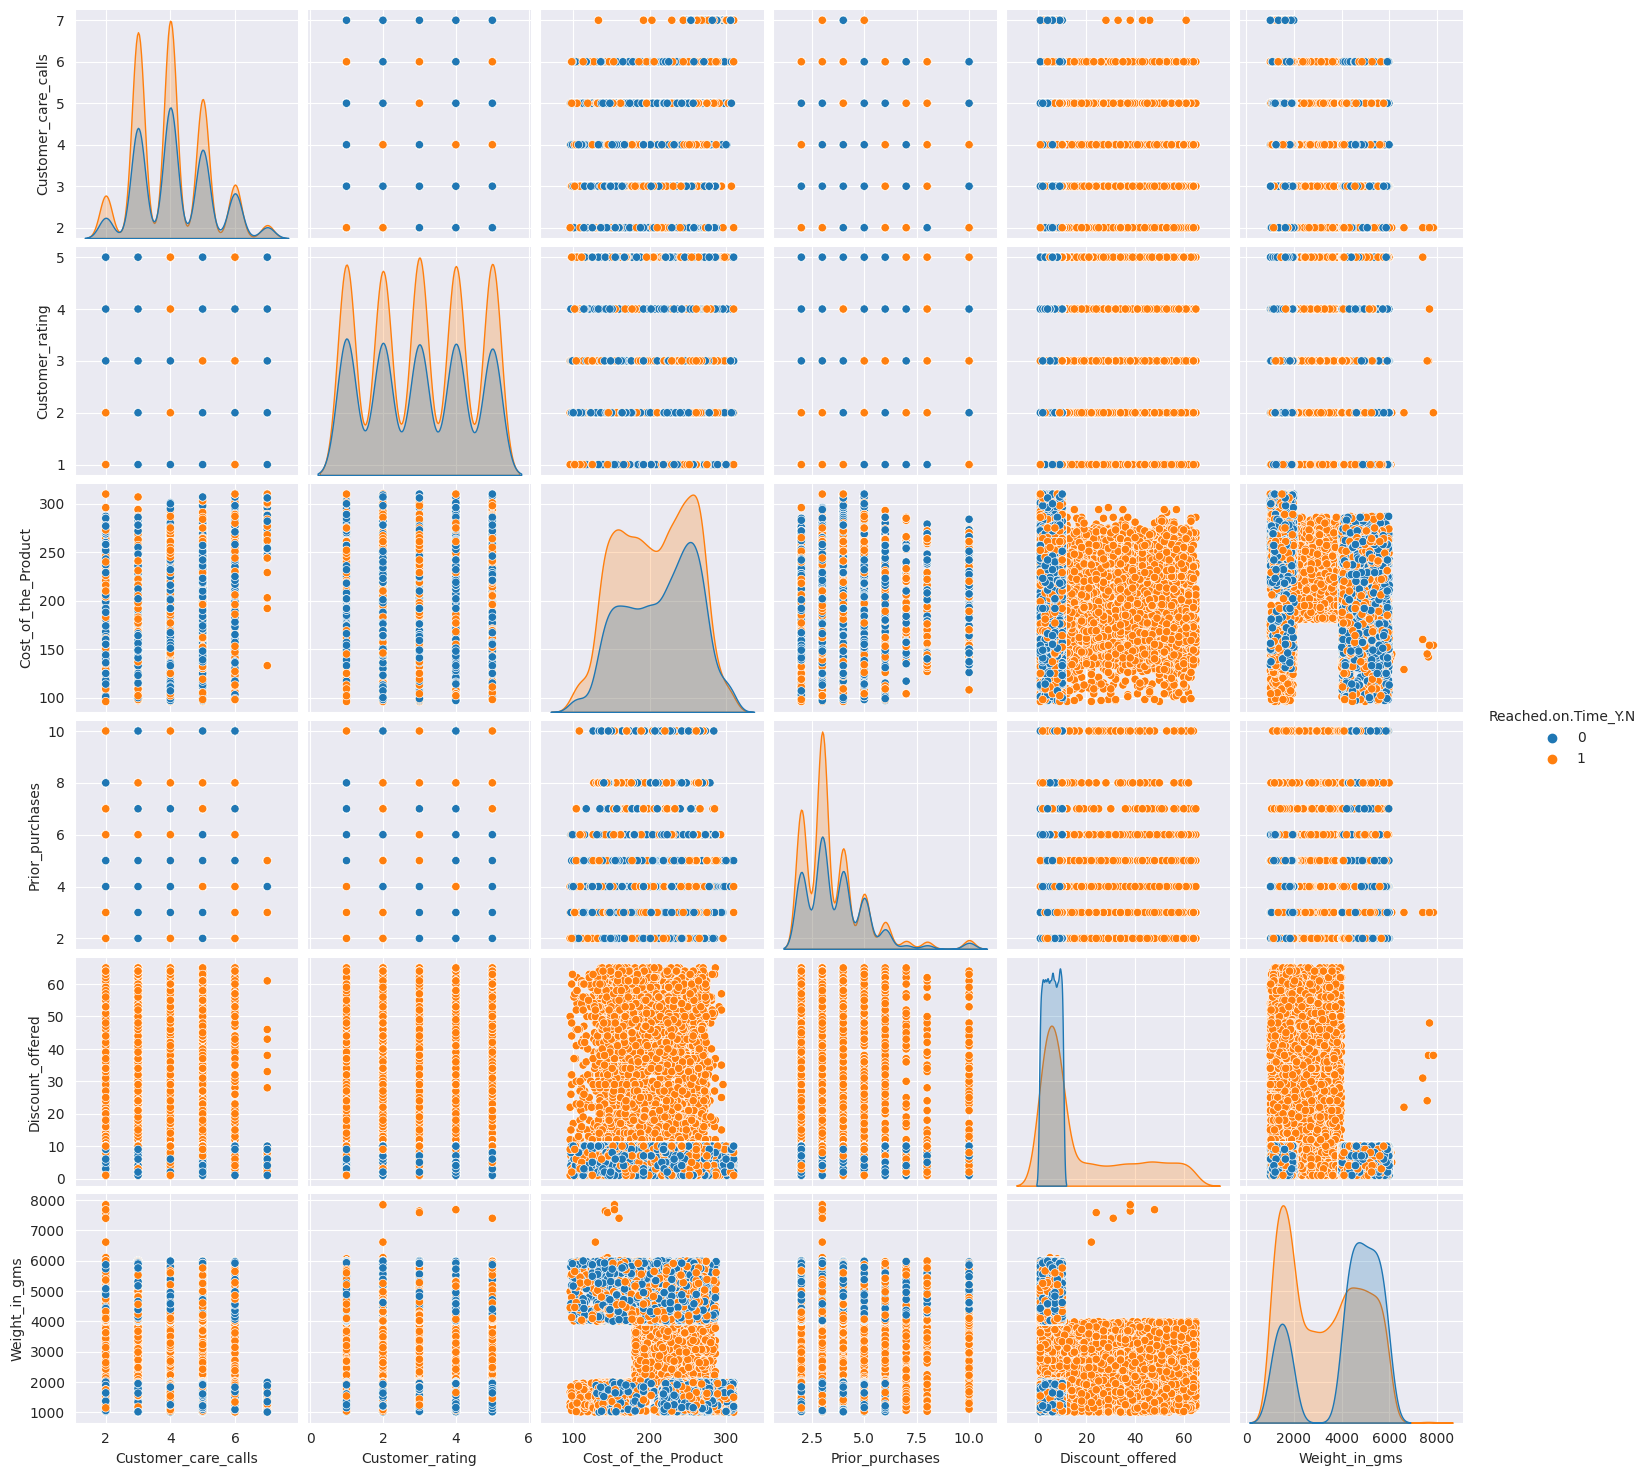

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Reached.on.Time_Y.N')

In [ ]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes('number').drop(['Reached.on.Time_Y.N'], axis=1).columns.values

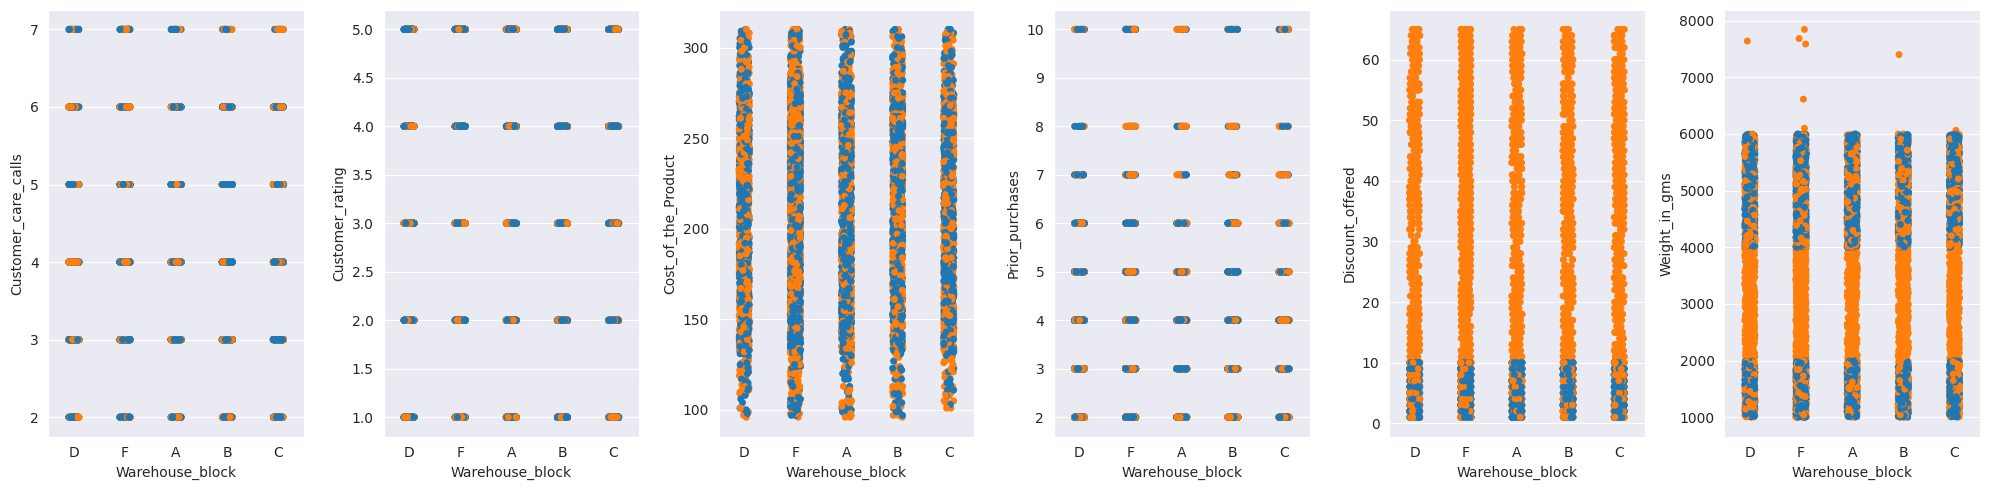

In [ ]:
# create strip plot for each categorical feature ['Warehouse_block']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[0], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

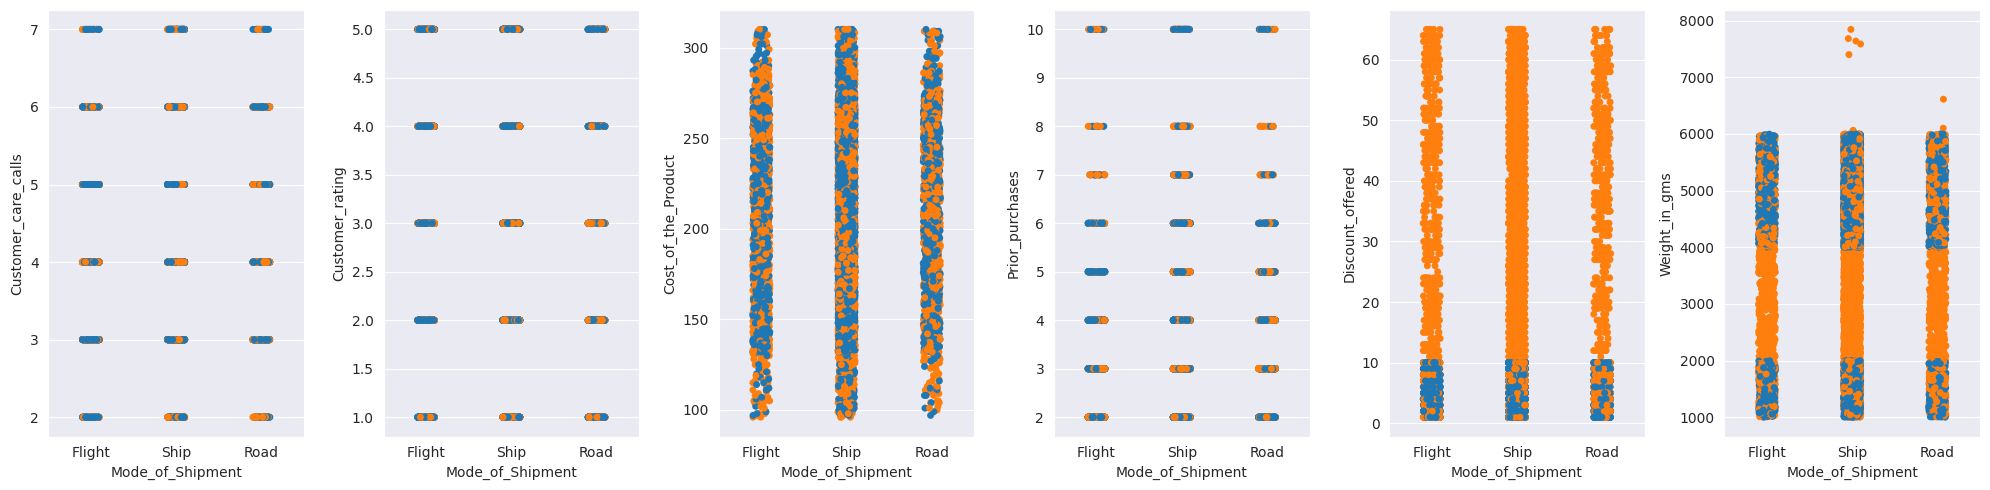

In [ ]:
# create strip plot for each categorical feature ['Mode_of_Shipment']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[1], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

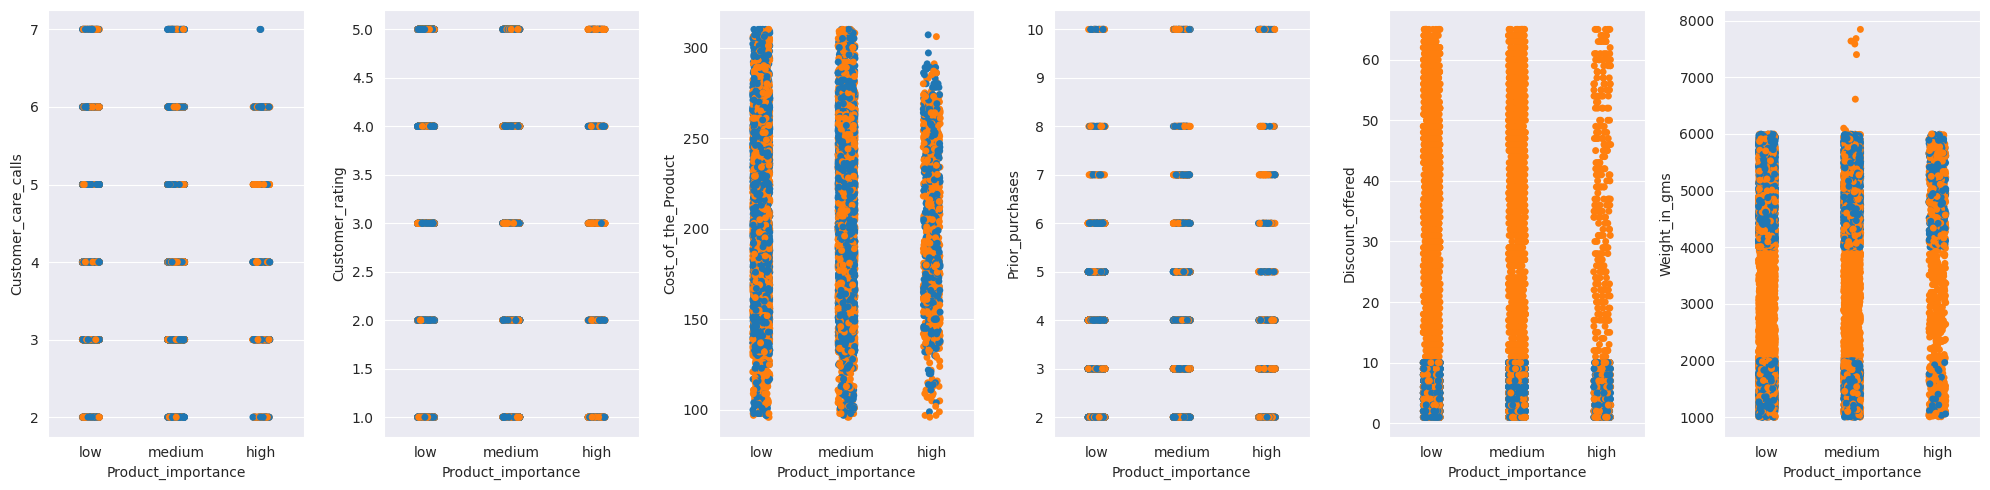

In [ ]:
# create strip plot for each categorical feature ['Product_importance']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[2], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

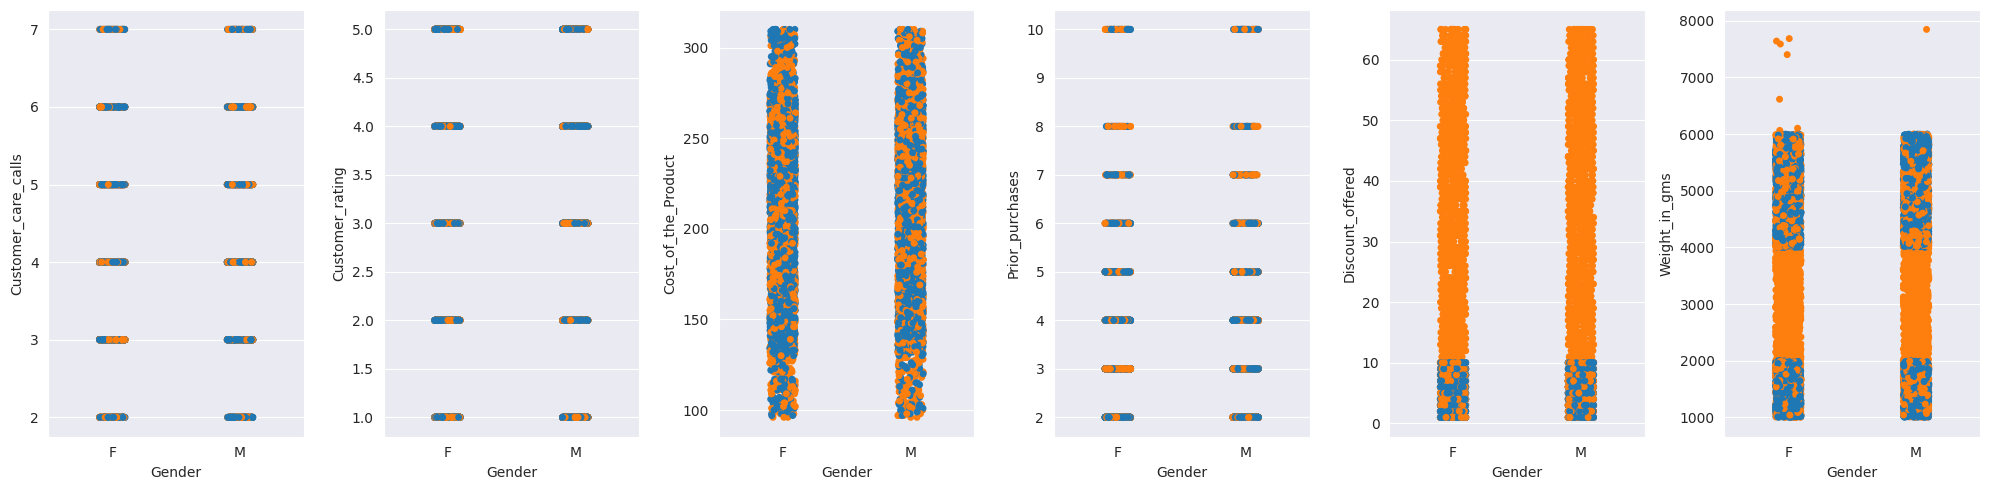

In [ ]:
# create strip plot for each categorical feature ['Gender']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x=categorical_columns[3], y=numerical_columns[i], hue='Reached.on.Time_Y.N', legend=False)
    plt.tight_layout()

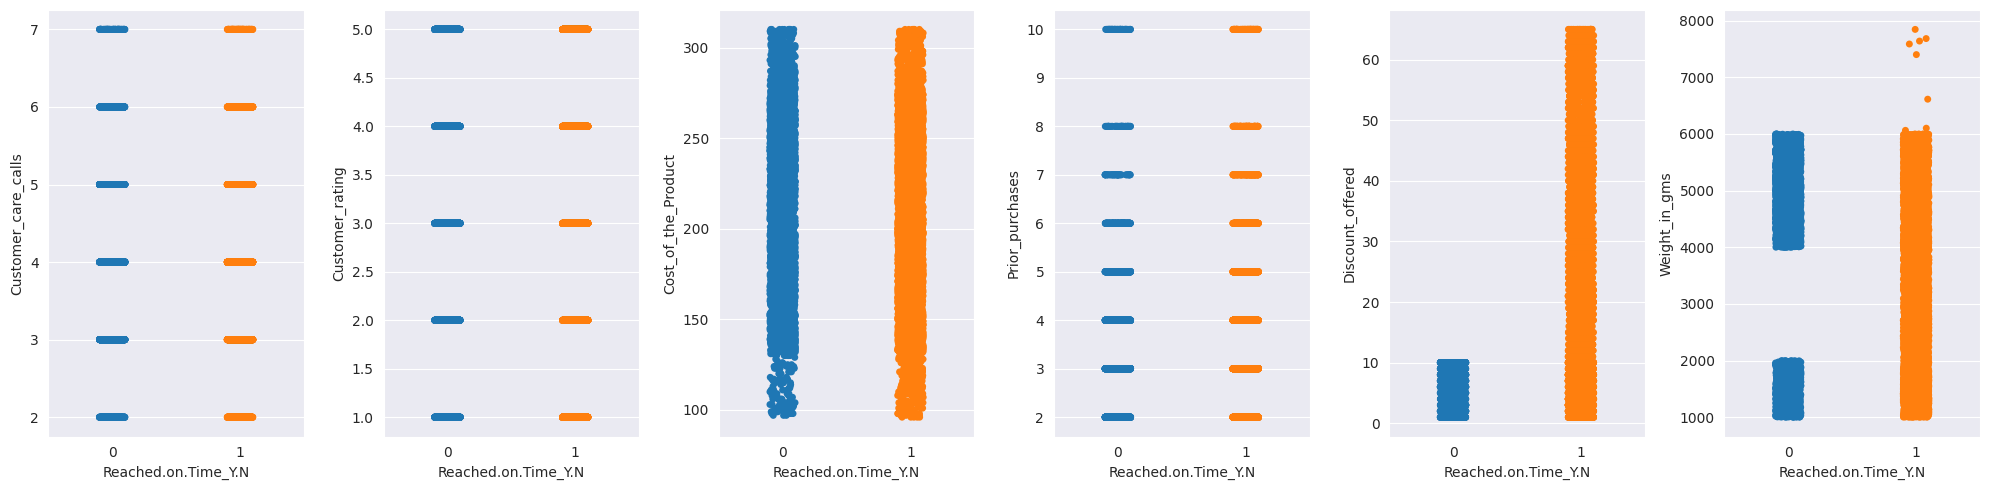

In [ ]:
# create strip plot for each categorical feature ['Reached.on.Time_Y.N']
fig = plt.figure(figsize=(20, 5))

for i in range(0, len(numerical_columns)):
    ax = fig.add_subplot(1, len(numerical_columns), i+1)
    sns.stripplot(ax=ax, data=df, x='Reached.on.Time_Y.N', y=numerical_columns[i], hue ='Reached.on.Time_Y.N',  legend=False)
    plt.tight_layout()

## 4. Business Insight

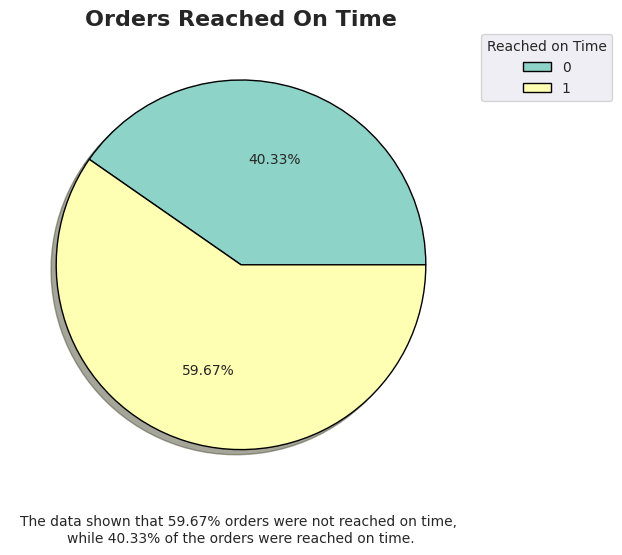

In [ ]:
m = df.groupby('Reached.on.Time_Y.N').agg({'ID' : 'nunique'}).reset_index()
m.columns = ['Reached on Time', 'Total Unique Customer']
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(m['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)
ax.set_title('Orders Reached On Time', ha = 'center', fontsize = 16, fontweight='bold')

ax.text(x = 0, y = -1.5, s = 'The data shown that 59.67% orders were not reached on time, \nwhile 40.33% of the orders were reached on time.', 
         ha = 'center', fontsize = 10)
ax.legend(labels = m['Reached on Time'], title = 'Reached on Time', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

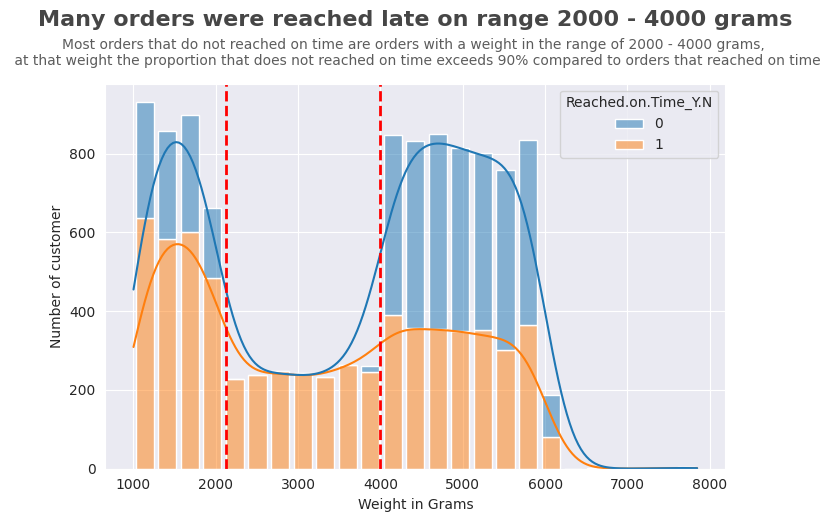

In [ ]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.histplot(x = 'Weight_in_gms', data = df, hue = 'Reached.on.Time_Y.N', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of customer')
ax.set_xlabel('Weight in Grams')
ax.axvline(2125, color = 'r', linestyle = '--', lw = 2)
ax.text(2125*1.1, 500, s='', weight = 'bold', alpha = 0.85)

ax.axvline(4000, color = 'r', linestyle = '--', lw = 2)
ax.text(4000*1.1, 500, s = '', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, 'Many orders were reached late on range 2000 - 4000 grams', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "Most orders that do not reached on time are orders with a weight in the range of 2000 - 4000 grams, \n at that weight the proportion that does not reached on time exceeds 90% compared to orders that reached on time", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.show()

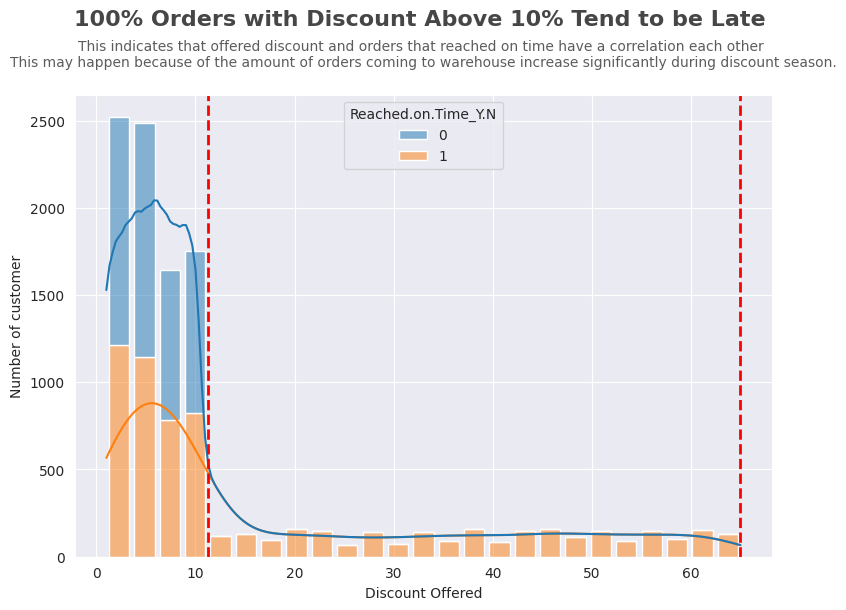

In [ ]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (9,6))

sns.histplot(x = 'Discount_offered', data = df, hue = 'Reached.on.Time_Y.N', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of customer')
ax.set_xlabel('Discount Offered')
ax.axvline(11.25, color = 'r', linestyle = '--', lw = 2)
ax.text(11.25*1.1, 500, s='', weight = 'bold', alpha = 0.85)

ax.axvline(65, color = 'r', linestyle = '--', lw = 2)
ax.text(65*1.1, 500, s = '', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, '100% Orders with Discount Above 10% Tend to be Late ', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "This indicates that offered discount and orders that reached on time have a correlation each other \nThis may happen because of the amount of orders coming to warehouse increase significantly during discount season.", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.show()